# Automated Exploratory Data Analysis Project

### Project Steps:

1) Importing necessary libraries.
2) Loading different types of data (CSV or Excel).
3) Data Preprocessing.
4) Data visualization (Pie plot, Bar plot, Histogram).
5) Applying the automated EDA tool on the data, using all the functions that we have previously built.

## This Project Involves Building An Automated EDA (Exploratory Data Analysis) Tool That Can Load, Pre-process And Visualize Data Using Python.

## __________________________________________________________________________

# Start Building The Automated EDA

In [1]:
# We will begin by importing all the packages that is necessary for this project:
import numpy as np
import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import warnings

In [2]:
# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

## Loading The Data

#### Loading data (CSV or Excel) using it's path 

In [3]:
# Loading the data
def load_data(data_path):
    """
    Load data from a file.

    Parameters:
    data_path (str): Path to the data file.

    Returns:
    pd.DataFrame: Loaded data as a pandas DataFrame.

    Raises:
    ValueError: If the file format is not supported (only CSV and Excel).
    """
    if data_path.endswith('.csv'):
        print(f"CSV Data Was Loaded from {data_path}")
        return pd.read_csv(data_path)
    
    elif data_path.endswith('.xlsx'):
        print(f"Excel Data Was Loaded from {data_path}")
        return pd.read_excel(data_path)
    
    else:
        raise ValueError("Unsupported file format. Only CSV and Excel files are supported.")

data_path = input('Please input the the path of the data ')

try:
    df = load_data(data_path)
except Exception as e:
    print("An error occurred while loading:", str(e))
    exit(1)   

Please input the the path of the data C:\Users\sgalal001\Desktop\Python\International_Report_Departures.csv
CSV Data Was Loaded from C:\Users\sgalal001\Desktop\Python\International_Report_Departures.csv


In [4]:
#Show The Data 
df

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10
1,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0,15,15
2,03/01/2007,2007,3,10721,BOS,13,12651,KEF,439,20402,GL,1,Departures,0,1,1
3,12/01/2004,2004,12,11259,DAL,74,16271,YYZ,936,20201,AMQ,1,Departures,0,1,1
4,05/01/2009,2009,5,13303,MIA,33,11075,CMW,219,21323,5L,0,Departures,0,20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930803,07/01/2000,2000,7,13303,MIA,33,13605,NAS,204,20398,MQ,1,Departures,1422,0,1422
930804,04/01/2019,2019,4,13303,MIA,33,14286,PTY,162,19770,CM,0,Departures,1439,0,1439
930805,08/01/2000,2000,8,13303,MIA,33,13605,NAS,204,20398,MQ,1,Departures,1441,0,1441
930806,09/01/2004,2004,9,12266,IAH,74,15632,VSA,148,19534,AM,0,Departures,1461,0,1461


## Data Preprocessing 

In [5]:
# Creating a function that can give us the main information and description of the data 
def Data_info(df):
    print("This Data Consists of " ,df.shape[0],"Rows")
    print("This Data Consists of",df.shape[1],"Columns\n\n\n")
   
    print('We can find below important info. about the data:\n')
    print(df.info())
    print('________________________________________________________________________')
    print('We can find below important description of the data:')
    
    return pd.DataFrame(df.describe())

In [6]:
Data_info(df)

This Data Consists of  930808 Rows
This Data Consists of 16 Columns



We can find below important info. about the data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930808 entries, 0 to 930807
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   data_dte      930808 non-null  object
 1   Year          930808 non-null  int64 
 2   Month         930808 non-null  int64 
 3   usg_apt_id    930808 non-null  int64 
 4   usg_apt       930808 non-null  object
 5   usg_wac       930808 non-null  int64 
 6   fg_apt_id     930808 non-null  int64 
 7   fg_apt        930808 non-null  object
 8   fg_wac        930808 non-null  int64 
 9   airlineid     930808 non-null  int64 
 10  carrier       927753 non-null  object
 11  carriergroup  930808 non-null  int64 
 12  type          930808 non-null  object
 13  Scheduled     930808 non-null  int64 
 14  Charter       930808 non-null  int64 
 15  Total         930808 non-null  

,Year,Month,usg_apt_id,usg_wac,fg_apt_id,fg_wac,airlineid,carriergroup,Scheduled,Charter,Total
count,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000
mean,2006.021361,6.414783,12809.473781,42.511740,13484.676238,466.910479,20057.217505,0.599361,40.003181,2.005483,42.008665
std,8.558831,3.471070,2716.223845,27.571338,1932.601107,288.005971,479.071456,0.490028,60.948973,8.278403,60.340835
min,1990.000000,1.000000,10010.000000,1.000000,10119.000000,106.000000,19386.000000,0.000000,0.000000,0.000000,1.000000
25%,1999.000000,3.000000,11618.000000,22.000000,11868.000000,205.000000,19704.000000,0.000000,0.000000,0.000000,3.000000
50%,2007.000000,6.000000,12892.000000,33.000000,13408.000000,427.000000,19991.000000,1.000000,17.000000,0.000000,20.000000
75%,2014.000000,9.000000,13487.000000,72.000000,15084.000000,736.000000,20312.000000,1.000000,60.000000,1.000000,60.000000
max,2020.000000,12.000000,99999.000000,93.000000,16881.000000,975.000000,22067.000000,1.000000,2019.000000,1092.000000,2019.000000


In [7]:
# Handling duplicates: if there is a column that has the same value in all of it's rows it will not be useful in the dataset so we will remove it
def handle_duplicates():
    for column in df:
        if df[column].duplicated().sum() == df.shape[0]-1:
            return df.drop([column], axis=1, inplace=True)

In [8]:
handle_duplicates()

In [9]:
# Showing the data after handling duplicates in a column that had the same value in all of it's rows
df

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,0,10,10
1,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,0,15,15
2,03/01/2007,2007,3,10721,BOS,13,12651,KEF,439,20402,GL,1,0,1,1
3,12/01/2004,2004,12,11259,DAL,74,16271,YYZ,936,20201,AMQ,1,0,1,1
4,05/01/2009,2009,5,13303,MIA,33,11075,CMW,219,21323,5L,0,0,20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930803,07/01/2000,2000,7,13303,MIA,33,13605,NAS,204,20398,MQ,1,1422,0,1422
930804,04/01/2019,2019,4,13303,MIA,33,14286,PTY,162,19770,CM,0,1439,0,1439
930805,08/01/2000,2000,8,13303,MIA,33,13605,NAS,204,20398,MQ,1,1441,0,1441
930806,09/01/2004,2004,9,12266,IAH,74,15632,VSA,148,19534,AM,0,1461,0,1461


In [10]:
# Classifing the data into numerical and categorical features
def data_classification(): 
    global num_list
    global cat_list
    num_list = []
    cat_list = []

    for column in df:
        if is_numeric_dtype(df[column]):
            num_list.append(column)
        elif is_string_dtype(df[column]):
            cat_list.append(column)    

    print('Numerical features : ', num_list)
    print('Categorical features : ', cat_list)

In [11]:
data_classification()

Numerical features :  ['Year', 'Month', 'usg_apt_id', 'usg_wac', 'fg_apt_id', 'fg_wac', 'airlineid', 'carriergroup', 'Scheduled', 'Charter', 'Total']
Categorical features :  ['data_dte', 'usg_apt', 'fg_apt', 'carrier']


In [12]:
def handling_data():
    # Handling missing values using simple imputer
    imputer = SimpleImputer(strategy='mean')
    df[num_list] = imputer.fit_transform(df[num_list])
 
    # Scale numerical features
    scaler = StandardScaler()
    df[num_list] = scaler.fit_transform(df[num_list])

In [13]:
# Showing numerical features after the preprocessing
df[num_list]

,Year,Month,usg_apt_id,usg_wac,fg_apt_id,fg_wac,airlineid,carriergroup,Scheduled,Charter,Total
0,2006,5,12016,5,13162,844,20177,1,0,10,10
1,2003,5,10299,1,13856,736,20007,1,0,15,15
2,2007,3,10721,13,12651,439,20402,1,0,1,1
3,2004,12,11259,74,16271,936,20201,1,0,1,1
4,2009,5,13303,33,11075,219,21323,0,0,20,20
...,...,...,...,...,...,...,...,...,...,...,...
930803,2000,7,13303,33,13605,204,20398,1,1422,0,1422
930804,2019,4,13303,33,14286,162,19770,0,1439,0,1439
930805,2000,8,13303,33,13605,204,20398,1,1441,0,1441
930806,2004,9,12266,74,15632,148,19534,0,1461,0,1461


In [14]:
# Rounding the data 
def rounding():
    df[num_list] =df[num_list].round(2)
    df[num_list]

In [15]:
df[num_list]

,Year,Month,usg_apt_id,usg_wac,fg_apt_id,fg_wac,airlineid,carriergroup,Scheduled,Charter,Total
0,2006,5,12016,5,13162,844,20177,1,0,10,10
1,2003,5,10299,1,13856,736,20007,1,0,15,15
2,2007,3,10721,13,12651,439,20402,1,0,1,1
3,2004,12,11259,74,16271,936,20201,1,0,1,1
4,2009,5,13303,33,11075,219,21323,0,0,20,20
...,...,...,...,...,...,...,...,...,...,...,...
930803,2000,7,13303,33,13605,204,20398,1,1422,0,1422
930804,2019,4,13303,33,14286,162,19770,0,1439,0,1439
930805,2000,8,13303,33,13605,204,20398,1,1441,0,1441
930806,2004,9,12266,74,15632,148,19534,0,1461,0,1461


In [16]:
# Data preprocessing fuction
def preprocess_data(df):
    #Handling the duplicates
    handle_duplicates()
    #Classifying the data into numerical and categorical features
    data_classification()
    #Handling data
    handling_data()
    #Rouding the data
    rounding()

In [17]:
preprocessed_data = preprocess_data(df)

Numerical features :  ['Year', 'Month', 'usg_apt_id', 'usg_wac', 'fg_apt_id', 'fg_wac', 'airlineid', 'carriergroup', 'Scheduled', 'Charter', 'Total']
Categorical features :  ['data_dte', 'usg_apt', 'fg_apt', 'carrier']


In [18]:
# Find correlations in the data
def correlations_in_data():
    global correlation
    correlation = df.corr()
    return correlation

In [19]:
# Show the correlations in the data
correlations_in_data()

,Year,Month,usg_apt_id,usg_wac,fg_apt_id,fg_wac,airlineid,carriergroup,Scheduled,Charter,Total
Year,1.000000,-0.021160,0.004986,0.065887,0.053496,0.045912,0.312454,0.022319,0.069295,-0.052617,0.062673
Month,-0.021160,1.000000,-0.000939,-0.001770,-0.000757,0.017464,-0.004076,-0.007368,0.013085,-0.007454,0.012132
usg_apt_id,0.004986,-0.000939,1.000000,0.068773,0.030191,-0.002272,0.050679,-0.009124,-0.022975,0.000537,-0.023093
usg_wac,0.065887,-0.001770,0.068773,1.000000,0.096088,-0.044880,-0.004335,-0.051150,0.041868,-0.024353,0.038896
fg_apt_id,0.053496,-0.000757,0.030191,0.096088,1.000000,0.505363,0.076351,-0.002014,0.082339,-0.027309,0.079570
fg_wac,0.045912,0.017464,-0.002272,-0.044880,0.505363,1.000000,-0.002524,-0.148585,0.109012,-0.039443,0.104705
airlineid,0.312454,-0.004076,0.050679,-0.004335,0.076351,-0.002524,1.000000,0.116284,-0.145590,0.081407,-0.135405
carriergroup,0.022319,-0.007368,-0.009124,-0.051150,-0.002014,-0.148585,0.116284,1.000000,-0.027143,0.040756,-0.021534
Scheduled,0.069295,0.013085,-0.022975,0.041868,0.082339,0.109012,-0.145590,-0.027143,1.000000,-0.141224,0.990656
Charter,-0.052617,-0.007454,0.000537,-0.024353,-0.027309,-0.039443,0.081407,0.040756,-0.141224,1.000000,-0.004932


In [20]:
# Visualizing the correlations in a heatmap
def heat_map():
    fig, ax = plt.subplots(figsize=(20,10))
    sns.heatmap(correlation, annot = True,linewidth=2,vmin=-1,vmax=1,cmap='rocket',fmt='0.2f',center=0)

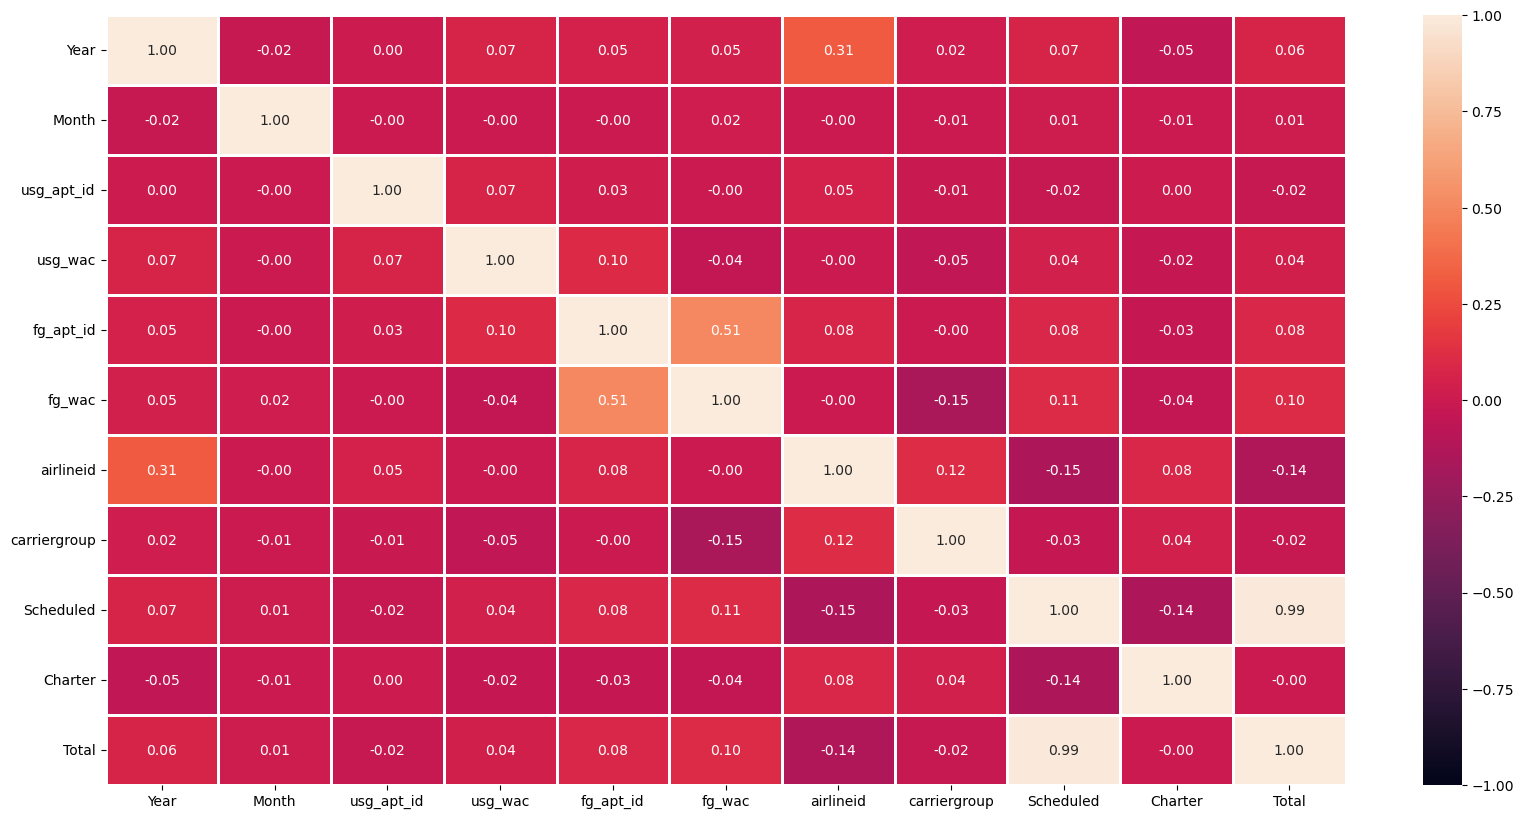

In [21]:
# Show the heatmap
heat_map()

## Data Visualization

In [22]:
# Creating the visualization functions
def create_pie_plot(data, feature):
    feature_counts = df[feature].value_counts()
    plt.figure(figsize=(8, 6))
    plt.pie(feature_counts, labels=feature_counts.index, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title(f'Pie Plot of {feature}')
    plt.show()
    
def create_bar_plot(data, feature):
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=feature)
    plt.title(f'Bar Plot of {feature}')
    plt.xticks(rotation=45)
    plt.show()

def create_histogram(ax, data, feature):
    sns.histplot(df[feature], bins=20, kde=True, ax=ax)
    ax.set_title(f'Histogram of {feature}')
    plt.tight_layout()
    plt.show()
    
def create_visualizations_for_column(data, column_name):
    fig_histogram, ax_histogram = plt.subplots(figsize=(8, 6))
    create_histogram(ax_histogram, df, column_name)
    
    fig_pie_plot = create_pie_plot(df, column_name)
    fig_bar_plot = create_bar_plot(df, column_name)

    figures = [fig_histogram, fig_pie_plot, fig_bar_plot]
    return figures  

In [23]:
# This function will help in continue visualizing the columns that we want 
def visualize():
    column_to_visualize = input("Enter the column name to visualize: ")
    figures = create_visualizations_for_column(preprocessed_data, column_to_visualize)
    while column_to_visualize:
        visualize_another_column = input("Do you want to visualize another column, choose (yes or no): ")
        if visualize_another_column == 'yes':
            print(data_classification())
            column_to_visualize = input("Enter the column name to visualize: ")
            figures = create_visualizations_for_column(preprocessed_data, column_to_visualize)
        elif visualize_another_column == 'no':
            break 
        else:
            print('Please enter (yes or no)')

# Automated EDA 

Enter the path of the file: C:\Users\sgalal001\Desktop\Python\International_Report_Departures.csv
CSV Data Was Loaded from C:\Users\sgalal001\Desktop\Python\International_Report_Departures.csv
Numerical features :  ['Year', 'Month', 'usg_apt_id', 'usg_wac', 'fg_apt_id', 'fg_wac', 'airlineid', 'carriergroup', 'Scheduled', 'Charter', 'Total']
Categorical features :  ['data_dte', 'usg_apt', 'fg_apt', 'carrier']
Enter the column name to visualize: Year


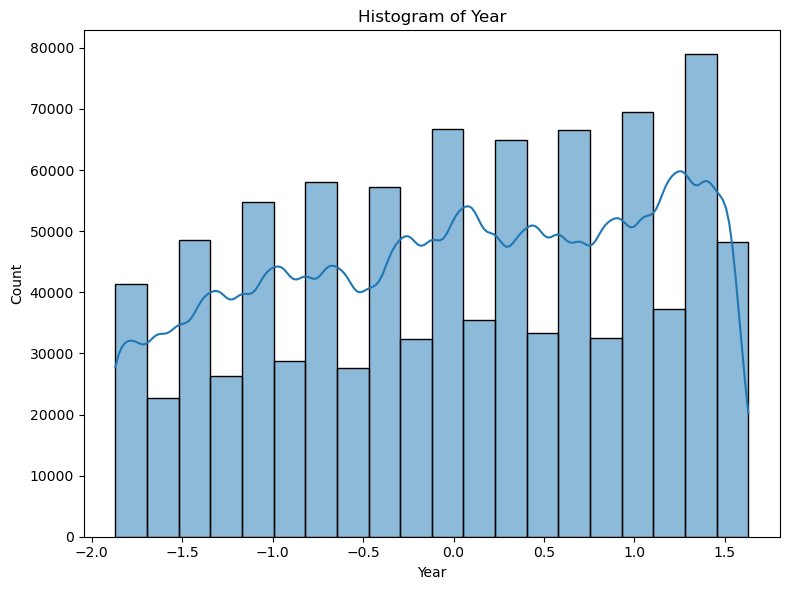

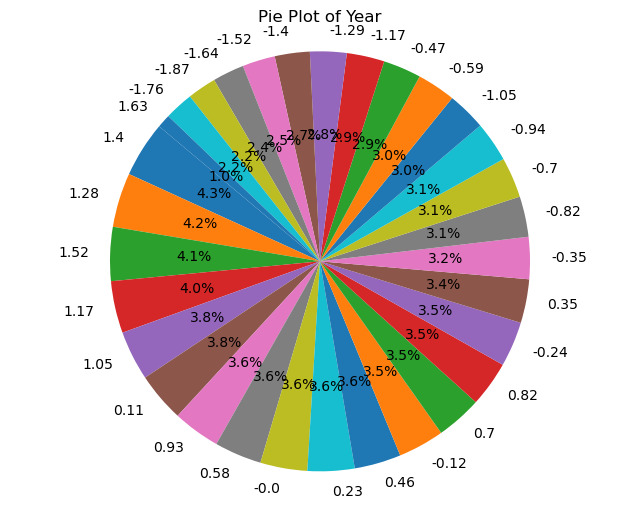

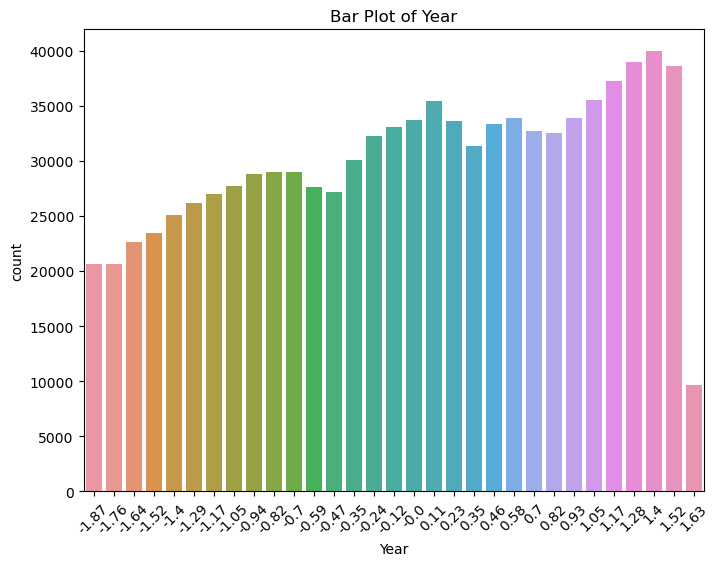

Do you want to visualize another column, choose (yes or no): yes
Numerical features :  ['Year', 'Month', 'usg_apt_id', 'usg_wac', 'fg_apt_id', 'fg_wac', 'airlineid', 'carriergroup', 'Scheduled', 'Charter', 'Total']
Categorical features :  ['data_dte', 'usg_apt', 'fg_apt', 'carrier']
None
Enter the column name to visualize: Month


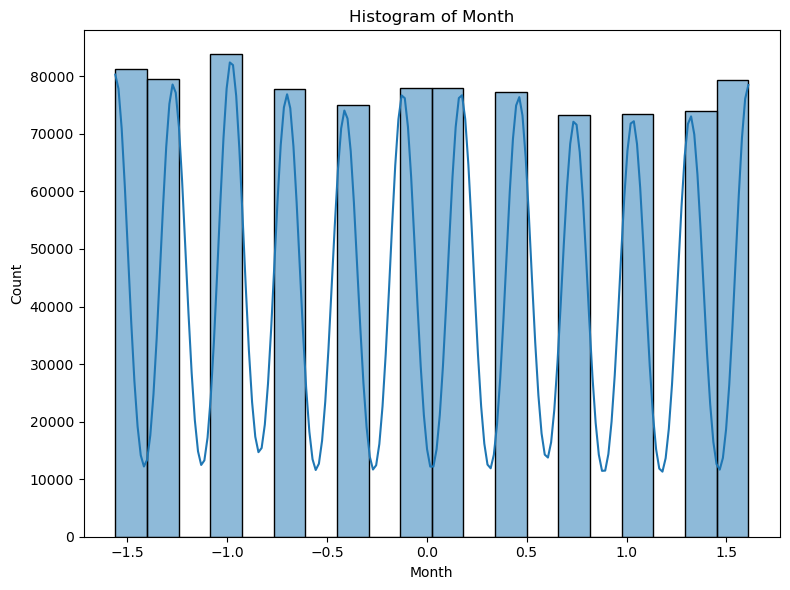

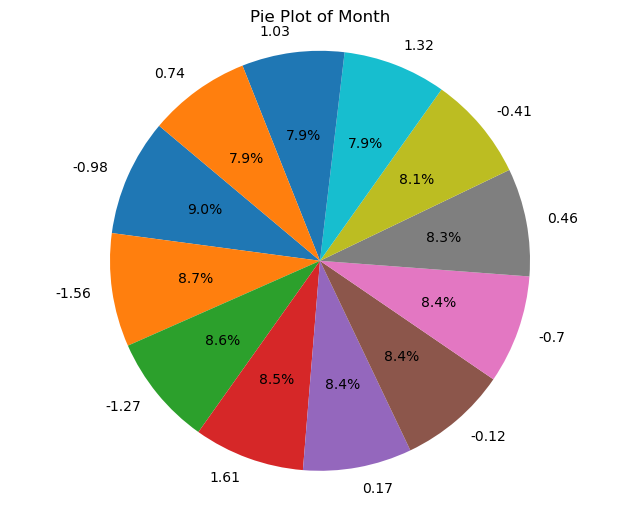

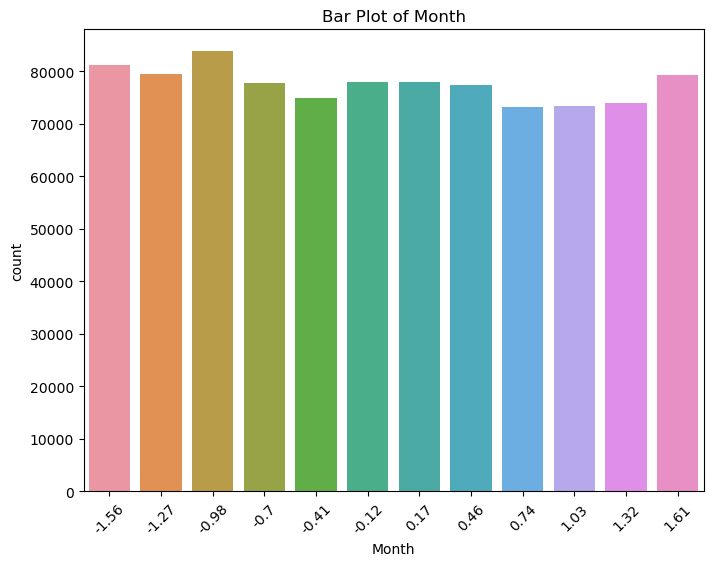

Do you want to visualize another column, choose (yes or no): no


In [24]:
def main():
    # Get user input for file path 
    file_path = input("Enter the path of the file: ")

    # Load and preprocess data
    df = load_data(file_path)
    preprocessed_data = preprocess_data(df)
    
    # Generate all types of plots for the chosen column
    visualize()
    

if __name__ == '__main__':
    main()